In [34]:
print(format('NTI Training Final Project', '-^99'))
print(format('Abdelrahman Bassem Ali a Graduate from  faculty of Navigation Science and Space Technology', '-^99'))

------------------------------------NTI Training Final Project-------------------------------------
----Abdelrahman Bassem Ali a Graduate from  faculty of Navigation Science and Space Technology-----


About Dataset
Context
Satellite imagery provides unique insights into various markets, including agriculture, defense and intelligence, energy, and finance. New commercial imagery providers, such as Planet, are using constellations of small satellites to capture images of the entire Earth every day.

This flood of new imagery is outgrowing the ability for organizations to manually look at each image that gets captured, and there is a need for machine learning and computer vision algorithms to help automate the analysis process.

The aim of this dataset is to help address the difficult task of detecting the location of large ships in satellite images. Automating this process can be applied to many issues including monitoring port activity levels and supply chain analysis.

Content
The dataset consists of images extracted from Planet satellite imagery collected over the San Francisco Bay and San Pedro Bay areas of California. It includes 4000 80x80 RGB images labeled with either a "ship" or "no-ship" classification. Images were derived from PlanetScope full-frame visual scene products, which are orthorectified to a 3-meter pixel size.

Provided is a zipped directory shipsnet.zip that contains the entire dataset as .png images. Each individual image filename follows a specific format: {label} _ {scene id} _ {longitude} _ {latitude}.png

label: Valued 1 or 0, representing the "ship" class and "no-ship" class, respectively.
scene id: The unique identifier of the PlanetScope visual scene the image was extracted from. The scene id can be used with the Planet API to discover and download the entire scene.
longitude_latitude: The longitude and latitude coordinates of the image center point, with values separated by a single underscore.
The dataset is also distributed as a JSON formatted text file shipsnet.json. The loaded object contains data, label, scene_ids, and location lists.

The pixel value data for each 80x80 RGB image is stored as a list of 19200 integers within the data list. The first 6400 entries contain the red channel values, the next 6400 the green, and the final 6400 the blue. The image is stored in row-major order so that the first 80 entries of the array are the red channel values of the first row of the image.

The list values at index i in labels, scene_ids, and locations each correspond to the i-th image in the data list.

In [35]:
#import libararies
import numpy as np
from numpy import expand_dims
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
%matplotlib inline

In [36]:
#read data from json
shipsnet = pd.read_json("/content/shipsnet.json")
shipsnet.head()

,data,labels,locations,scene_ids
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1,"[-118.2254694333423, 33.73803725920789]",20180708_180909_0f47
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1,"[-122.33222866289329, 37.7491755586813]",20170705_180816_103e
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1,"[-118.14283073363218, 33.736016066914175]",20180712_211331_0f06
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1,"[-122.34784341495181, 37.76648707436548]",20170609_180756_103a
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1,"[-122.34852408322172, 37.75878462398653]",20170515_180653_1007


In [37]:
shipsnet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       4000 non-null   object
 1   labels     4000 non-null   int64 
 2   locations  4000 non-null   object
 3   scene_ids  4000 non-null   object
dtypes: int64(1), object(3)
memory usage: 125.1+ KB


In [38]:
print(len(shipsnet["data"].iloc[0]))
shipsnet.shape

19200


(4000, 4)

In [39]:
shipsnet["labels"].value_counts()

0    3000
1    1000
Name: labels, dtype: int64

In [40]:
x = np.concatenate(shipsnet["data"].values)
min_rgb_value = np.min(x)
print(f"Min RGB value: {min_rgb_value}.")
max_rgb_value = np.max(x)
print(f"Max RGB value: {max_rgb_value}.")
print(f"NaN values: {np.isnan(x).sum()}.")
x

Min RGB value: 1.
Max RGB value: 255.
NaN values: 0.


array([82, 89, 91, ..., 51, 46, 69])

In [41]:
#Normalize data
shipsnet["normalised_data"] = shipsnet["data"].apply(lambda x : np.array(x) / max_rgb_value)

 preparing image data for machine model

In [42]:
#reshape data (rearrange the data)
shipsnet["reshaped_data"] = shipsnet["normalised_data"].apply(lambda x : x.reshape([3, 80, 80]).transpose([1, 2, 0]))

 The shape of each element in "reshaped_data" is [80, 80, 3], representing an image with dimensions 80x80 pixels and three color channels (RGB)

In [43]:
shipsnet = shipsnet[["reshaped_data", "labels"]]
shipsnet

,reshaped_data,labels
0,"[[[0.3215686274509804, 0.3686274509803922, 0.3...",1
1,"[[[0.2980392156862745, 0.33725490196078434, 0....",1
2,"[[[0.49019607843137253, 0.5333333333333333, 0....",1
3,"[[[0.4, 0.4117647058823529, 0.3411764705882353...",1
4,"[[[0.3058823529411765, 0.3215686274509804, 0.2...",1
...,...,...
3995,"[[[0.49411764705882355, 0.403921568627451, 0.3...",0
3996,"[[[0.5098039215686274, 0.47843137254901963, 0....",0
3997,"[[[0.6705882352941176, 0.6823529411764706, 0.6...",0
3998,"[[[0.3333333333333333, 0.3607843137254902, 0.3...",0


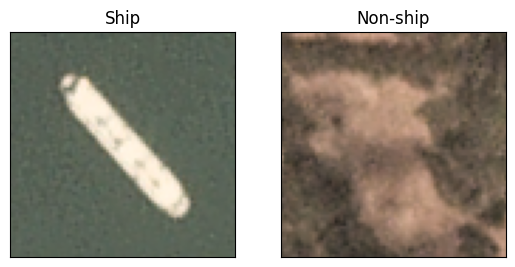

In [44]:
#plot the images
# First subplot
plt.subplot(121)
plt.title("Ship")
plt.xticks([])
plt.yticks([])
plt.imshow(shipsnet["reshaped_data"][0])
# Second subplot
plt.subplot(122)
plt.title("Non-ship")
plt.xticks([])
plt.yticks([])
plt.imshow(shipsnet["reshaped_data"][3995])
plt.show()

In [45]:
#split data into x,y
X = shipsnet["reshaped_data"]
y = shipsnet["labels"]

In [46]:
#split data into train, test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)

x_train shape (3200,)
x_test shape (800,)


In [48]:
# convert numpy arrays of type float for Keras.
X_train = np.array(X_train.tolist()).astype(float)
X_test = np.array(X_test.tolist()).astype(float)
y_train = np.array(y_train.tolist()).astype(float)
y_test = np.array(y_test.tolist()).astype(float)

In [49]:
#Initialisation of DL model.
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Activation
import tensorflow as tf

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(80, 80, 3)))        #Adds a convolutional layer with 32 filters of size (3, 3) and ReLU activation. The input_shape parameter specifies the input shape of the layer.
model.add(layers.MaxPooling2D((2, 2))) #Adds a max-pooling layer with a pool size of (2, 2) to downsample the spatial dimensions.

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) #Adds a flatten layer to flatten the output from the convolutional layers. This prepares the data for the fully connected layers.

model.add(layers.Dense(512, activation='relu'))#Adds a fully connected layer with 512 units and ReLU activation. This layer captures high-level features learned from the convolutional layers.

model.add(layers.Dense(1, activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 39, 39, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 18, 18, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 128)        

In [51]:
#compile the model
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [52]:
# fit the model.
history = model.fit(
      X_train,
      y_train,
      epochs=10,
      validation_data=(X_test, y_test),
      )

Epoch 1/10
100/100 [==============================] - 2s 13ms/step - loss: 0.4685 - accuracy: 0.8159 - val_loss: 0.2471 - val_accuracy: 0.8863
Epoch 2/10
100/100 [==============================] - 1s 9ms/step - loss: 0.2270 - accuracy: 0.9094 - val_loss: 0.1631 - val_accuracy: 0.9300
Epoch 3/10
100/100 [==============================] - 1s 9ms/step - loss: 0.1588 - accuracy: 0.9347 - val_loss: 0.1331 - val_accuracy: 0.9475
Epoch 4/10
100/100 [==============================] - 1s 10ms/step - loss: 0.1236 - accuracy: 0.9588 - val_loss: 0.0918 - val_accuracy: 0.9737
Epoch 5/10
100/100 [==============================] - 2s 19ms/step - loss: 0.0811 - accuracy: 0.9750 - val_loss: 0.0755 - val_accuracy: 0.9800
Epoch 6/10
100/100 [==============================] - 1s 11ms/step - loss: 0.0574 - accuracy: 0.9791 - val_loss: 0.0786 - val_accuracy: 0.9775
Epoch 7/10
100/100 [==============================] - 1s 11ms/step - loss: 0.0492 - accuracy: 0.9816 - val_loss: 0.1006 - val_accuracy: 0.9675
E

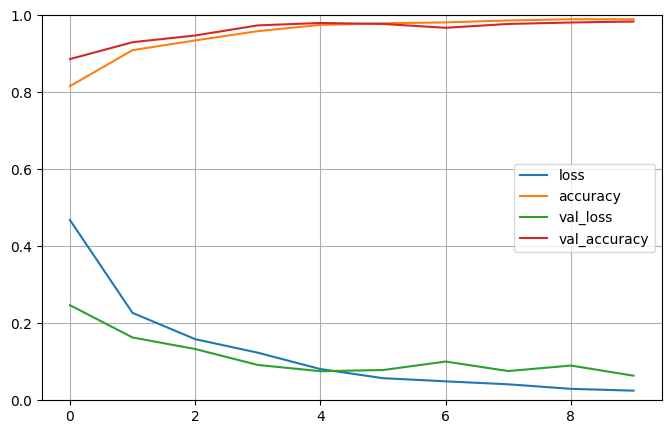

In [53]:
#plot accuracr,loss
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Convert predicted probabilities to binary values (0 or 1)
binary_predictions = predictions.round()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, binary_predictions)
print(f'Accuracy: {accuracy:.4f}')

# Calculate and print precision
precision = precision_score(y_test, binary_predictions)
print(f'Precision: {precision:.4f}')

# Calculate and print recall
recall = recall_score(y_test, binary_predictions)
print(f'Recall: {recall:.4f}')

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.9838
Precision: 0.9623
Recall: 0.9761
Confusion Matrix:
[[583   8]
 [  5 204]]
